# Propensity to buy Term Deposit

# EDA on the Dataset

In [30]:
#Change directory and load catalog and pipeline from Kedro
%cd "D:\University\CST4090 - Thesis\Propensity Model\thesis-propensity-model"
%reload_kedro

D:\University\CST4090 - Thesis\Propensity Model\thesis-propensity-model


[09/20/22 23:30:58] INFO     No path argument was provided. Using: D:\University\CST4090 -            ]8;id=724498;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=859794;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#55\55]8;;\
                             Thesis\Propensity Model\thesis-propensity-model                                       

[09/20/22 23:30:58] INFO     Kedro project thesis_propensity_model                                    ]8;id=738258;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=344946;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

[09/20/22 23:30:59] INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=586580;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=545238;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#79\79]8;;\

                    INFO     Registered line magic 'reload_kedro_mlflow'                              ]8;id=933591;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=829557;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#85\85]8;;\

                    INFO     Registered line magic 'run_viz'                                          ]8;id=479976;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=244895;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#85\85]8;;\

In [2]:
#Loading packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

[09/20/22 20:19:29] WARNING  C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\seaborn\rcm ]8;id=449667;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py\warnings.py]8;;\:]8;id=578497;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py#109\109]8;;\
                             od.py:82: DeprecationWarning: distutils Version classes are                           
                             deprecated. Use packaging.version instead.                                            
                               if LooseVersion(mpl.__version__) >= "3.0":                                          
                                                                                                                   

                    WARNING  C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\setuptools\ ]8;id=136041;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py\warnings.py]8;;\:]8;id=702102;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py#109\109]8;;\
                             _distutils\version.py:351: DeprecationWarning: distutils Version                      
                             classes are deprecated. Use packaging.version instead.                                
                               other = LooseVersion(other)                                                         
                                                                                                                   

In [3]:
#Load the Raw Dataset
bank_raw=catalog.load("bank_raw")

                    INFO     Loading data from 'bank_raw' (CSVDataSet)...                       ]8;id=82266;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=653769;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [4]:
#Check number of columns and rows of dataset
bank_raw.shape

(41188, 21)

In [5]:
#See column names of the dataset
bank_raw.columns.to_list()

[
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    'y'
]

In [6]:
#Verify top rows of the dataframe
bank_raw.head(10)

age 
 job 
 marital 
 education 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 ... 
 campaign 
 pdays 
 previous 
 poutcome 
 emp.var.rate 
 cons.price.idx 
 cons.conf.idx 
 euribor3m 
 nr.employed 
 y 
 
 
 
 
 0 
 56 
 housemaid 
 married 
 basic.4y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 1 
 57 
 services 
 married 
 high.school 
 unknown 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 2 
 37 
 services 
 married 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 3 
 40 
 admin. 
 married 
 basic.6y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 4 
 56 
 services 
 married 
 high.school 
 no 
 no 
 yes 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 5 
 45 
 services 
 married 
 basic.9y 
 unknown 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 6 
 59 
 admin. 
 married 
 professional.course 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 7 
 41 
 blue-collar 
 married 
 unknown 
 unknown 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 8 
 24 
 technician 
 single 
 professional.course 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 9 
 25 
 services 
 single 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 
 10 rows × 21 columns

In [7]:
#Describe the dataframe and understand the field distribution
bank_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank_raw.describe()

age 
 duration 
 campaign 
 pdays 
 previous 
 emp.var.rate 
 cons.price.idx 
 cons.conf.idx 
 euribor3m 
 nr.employed 
 
 
 
 
 count 
 41188.00000 
 41188.000000 
 41188.000000 
 41188.000000 
 41188.000000 
 41188.000000 
 41188.000000 
 41188.000000 
 41188.000000 
 41188.000000 
 
 
 mean 
 40.02406 
 258.285010 
 2.567593 
 962.475454 
 0.172963 
 0.081886 
 93.575664 
 -40.502600 
 3.621291 
 5167.035911 
 
 
 std 
 10.42125 
 259.279249 
 2.770014 
 186.910907 
 0.494901 
 1.570960 
 0.578840 
 4.628198 
 1.734447 
 72.251528 
 
 
 min 
 17.00000 
 0.000000 
 1.000000 
 0.000000 
 0.000000 
 -3.400000 
 92.201000 
 -50.800000 
 0.634000 
 4963.600000 
 
 
 25% 
 32.00000 
 102.000000 
 1.000000 
 999.000000 
 0.000000 
 -1.800000 
 93.075000 
 -42.700000 
 1.344000 
 5099.100000 
 
 
 50% 
 38.00000 
 180.000000 
 2.000000 
 999.000000 
 0.000000 
 1.100000 
 93.749000 
 -41.800000 
 4.857000 
 5191.000000 
 
 
 75% 
 47.00000 
 319.000000 
 3.000000 
 999.000000 
 0.000000 
 1.400000 
 93.994000 
 -36.400000 
 4.961000 
 5228.100000 
 
 
 max 
 98.00000 
 4918.000000 
 56.000000 
 999.000000 
 7.000000 
 1.400000 
 94.767000 
 -26.900000 
 5.045000 
 5228.100000

In [9]:
bank_raw.describe(include=["object"])

job 
 marital 
 education 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 poutcome 
 y 
 
 
 
 
 count 
 41188 
 41188 
 41188 
 41188 
 41188 
 41188 
 41188 
 41188 
 41188 
 41188 
 41188 
 
 
 unique 
 12 
 4 
 8 
 3 
 3 
 3 
 2 
 10 
 5 
 3 
 2 
 
 
 top 
 admin. 
 married 
 university.degree 
 no 
 yes 
 no 
 cellular 
 may 
 thu 
 nonexistent 
 no 
 
 
 freq 
 10422 
 24928 
 12168 
 32588 
 21576 
 33950 
 26144 
 13769 
 8623 
 35563 
 36548

In [10]:
#Check for nulls
bank_raw.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
#Loop through all columns and print unique value counts
for col in bank_raw.columns:
        print(col)
        print(bank_raw[col].value_counts(),end="\n")


age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: hou

In [12]:
#Description of the columns
bank_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Demographics

age - client's age in years (numeric)

job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)

marital - marital status (categorical: divorced, married, single, unknown)

education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)


Financial/product Holding

default - has credit in default? (categorical: no, yes, unknown)

housing - has housing loan? (categorical: no, yes, unknown)

loan - has personal loan? (categorical: no, yes, unknown)


Previous campaign details

contact - contact communication type (categorical: cellular, telephone)

month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)

day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)

duration - last contact duration, in seconds (numeric).

campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)

pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the 
client has not been previously contacted)

previous - number of contacts performed for this client before this campaign (numeric)

poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)


Indicators

emp.var.rate - employment variation rate, quarterly indicator (numeric)

cons.price.idx - consumer price index, monthly indicator (numeric)

cons.conf.idx - consumer confidence index, monthly indicator (numeric)

euribor3m - euribor 3 month rate, daily indicator (numeric)

nr.employed - number of employees, quarterly indicator (numeric)


Output feature (desired target):

y - has the client subscribed a term deposit? (binary: yes,no)

In [13]:
#Rename the target column and create new encoded column for target
bank_raw.rename(columns={'y':'deposit'},inplace=True)
dict_target = {"no": 0, "yes": 1}
bank_raw["deposit_encoded"] = bank_raw["deposit"].map(dict_target)
bank_raw.head()

age 
 job 
 marital 
 education 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 ... 
 pdays 
 previous 
 poutcome 
 emp.var.rate 
 cons.price.idx 
 cons.conf.idx 
 euribor3m 
 nr.employed 
 deposit 
 deposit_encoded 
 
 
 
 
 0 
 56 
 housemaid 
 married 
 basic.4y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 0 
 
 
 1 
 57 
 services 
 married 
 high.school 
 unknown 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 0 
 
 
 2 
 37 
 services 
 married 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 ... 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 0 
 
 
 3 
 40 
 admin. 
 married 
 basic.6y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 0 
 
 
 4 
 56 
 services 
 married 
 high.school 
 no 
 no 
 yes 
 telephone 
 may 
 mon 
 ... 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 0 
 
 
 
 5 rows × 22 columns

In [14]:
#Print share of customers with term deposit
print("Share of customers with term deposit =", '{:.1%}'.format(bank_raw["deposit_encoded"].mean()))

Share of customers with term deposit = 11.3%


In [15]:
#Count of Customers with and without deposit
bank_raw["deposit"].value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

From a business perspective, the number of active customers holding deposit is very less which is not good for the bank as liabilities/deposits lead to balance the books. 

From modelling perspective, the target class is imbalanced and needs to be taken care while model training 

In [16]:
bank_raw[bank_raw["deposit_encoded"] == 1].mean() 

age                  40.913147
duration            553.191164
campaign              2.051724
pdays               792.035560
previous              0.492672
emp.var.rate         -1.233448
cons.price.idx       93.354386
cons.conf.idx       -39.789784
euribor3m             2.123135
nr.employed        5095.115991
deposit_encoded       1.000000
dtype: float64

In [17]:
bank_raw[bank_raw["deposit_encoded"] == 0].mean() 

age                  39.911185
duration            220.844807
campaign              2.633085
pdays               984.113878
previous              0.132374
emp.var.rate          0.248875
cons.price.idx       93.603757
cons.conf.idx       -40.593097
euribor3m             3.811491
nr.employed        5176.166600
deposit_encoded       0.000000
dtype: float64

# Data Visualization

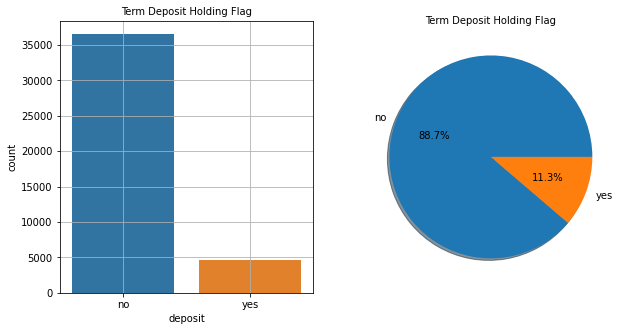

In [18]:
#Target Product Holding Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=bank_raw)
plt.title("Term Deposit Holding Flag",size = 10)
plt.grid()
plt.subplot(1,2,2)
labels =bank_raw['deposit'].value_counts(sort = True).index
sizes = bank_raw['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Term Deposit Holding Flag',size = 10)
plt.show()

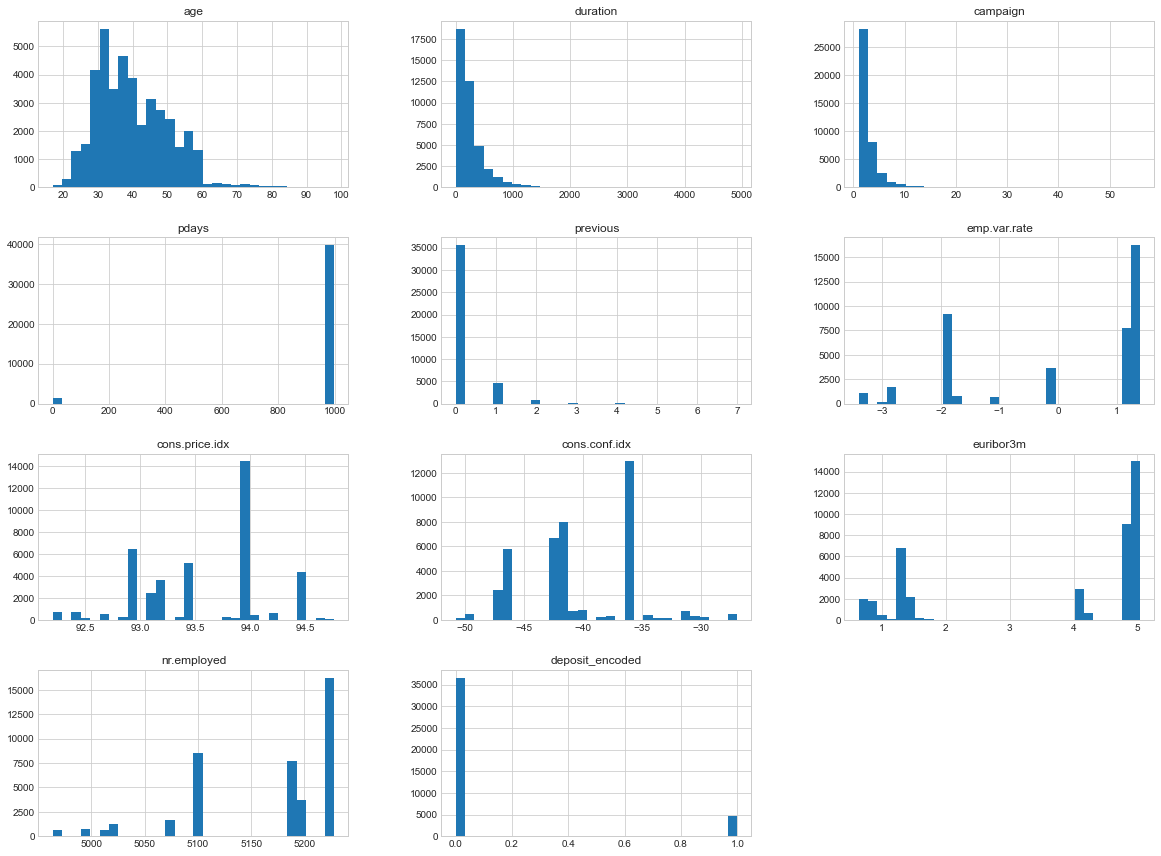

In [19]:
plt.style.use('seaborn-whitegrid')

bank_raw.hist(bins=30, figsize=(20,15))
plt.show()

In [20]:
#Plot Numerical features and categorical as boxplot and countplot

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorics=['object']

bank_raw_cat = bank_raw.select_dtypes(include=categorics)
bank_raw_num = pd.concat([bank_raw.select_dtypes(include=numerics),bank_raw[['deposit']]],axis=1)

bank_raw_num_columns=bank_raw.select_dtypes(include=numerics)

print(bank_raw_cat.columns)
print(bank_raw_num.columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'deposit_encoded', 'deposit'],
      dtype='object')


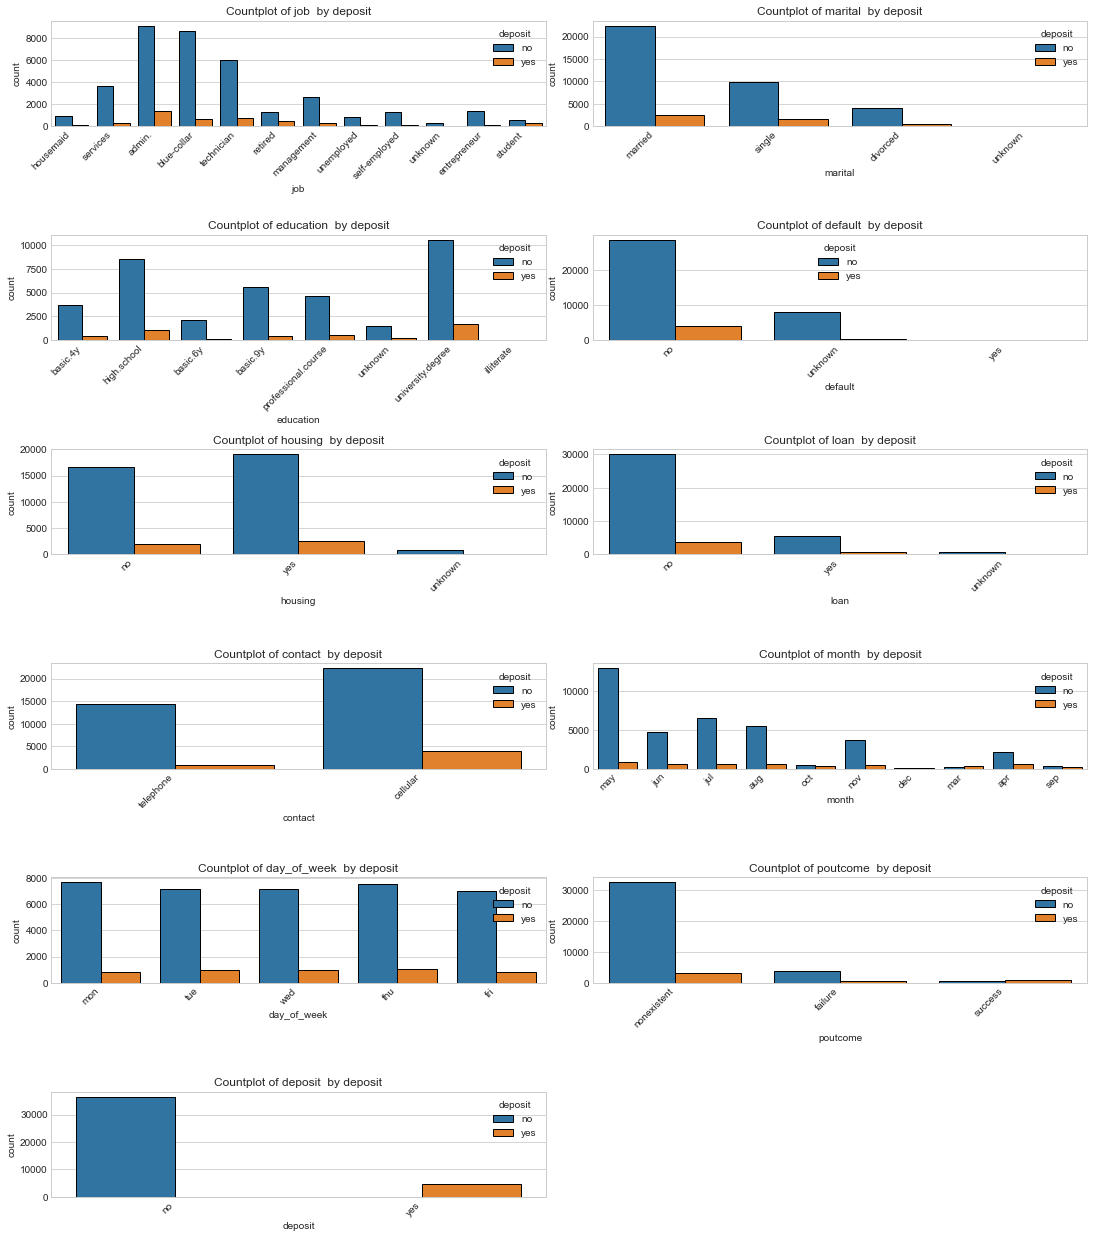

In [21]:
#Plot categorical features
plt.figure(figsize=(15,17))
for i,cat_fea in enumerate(bank_raw_cat):
    plt.subplot(6,2,i+1)
    chart=sns.countplot(x=cat_fea,hue='deposit',data=bank_raw_cat,edgecolor="black")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout(pad=0., w_pad=0.3, h_pad=1.0)    
plt.show()

The Imbalanced nature of term deposit holding makes it difficult to get insights from the countplot, lets understand how boxplot is able to segregate feature for the target variable

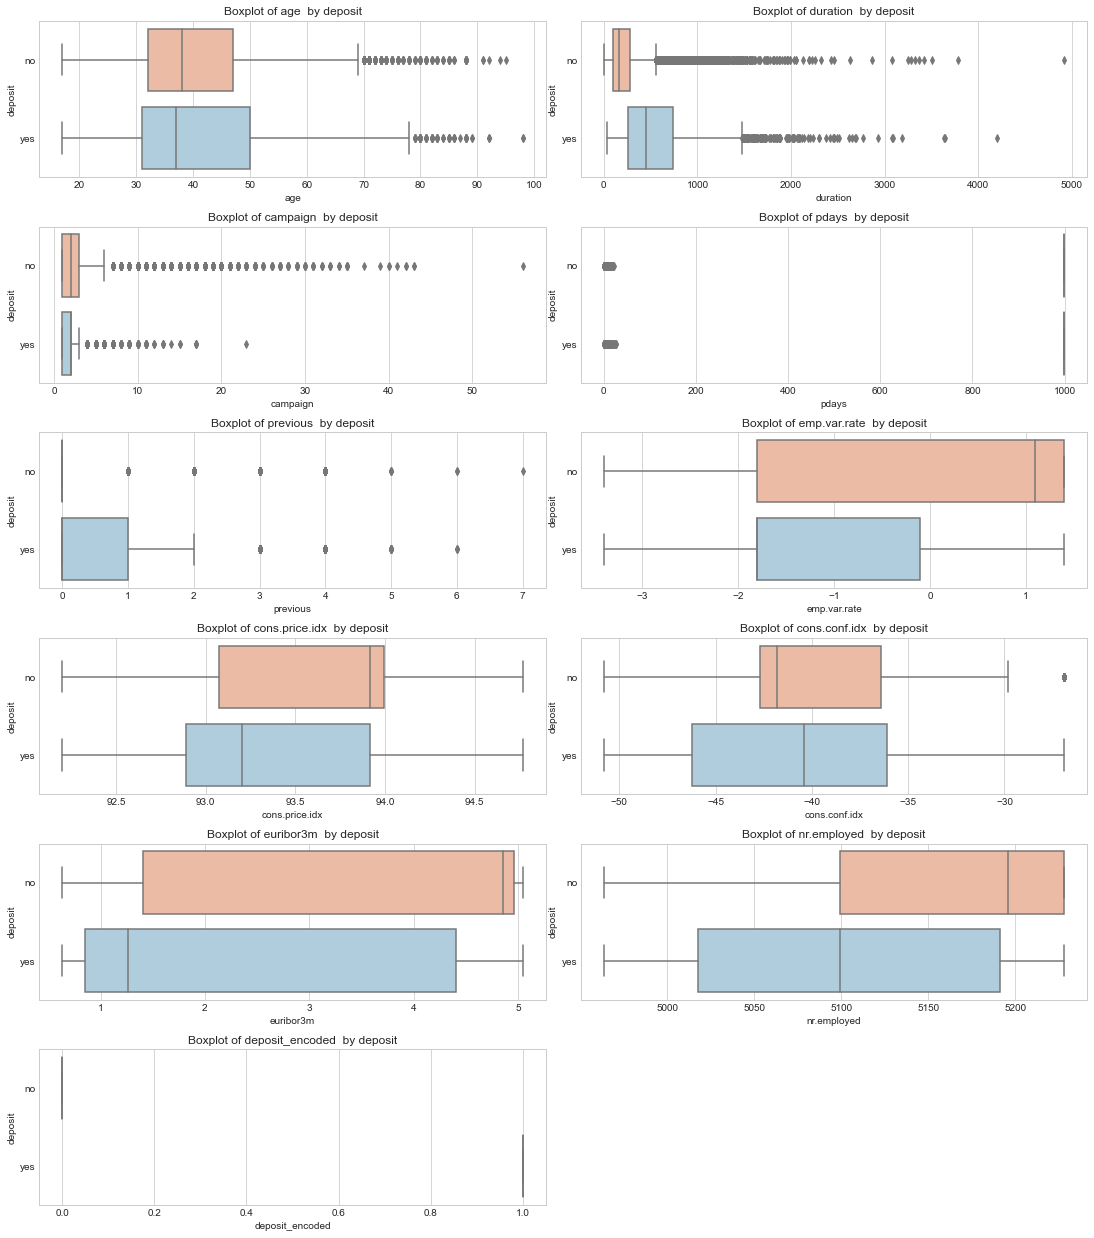

In [22]:
#Plot Numerical features
plt.figure(figsize=(15,17))
for i,num_fea in enumerate(bank_raw_num_columns):
    plt.subplot(6,2,i+1)
    chart=sns.boxplot(x=num_fea,y='deposit',data=bank_raw_num,palette="RdBu")
    plt.title("Boxplot of {}  by deposit".format(num_fea))
plt.tight_layout(pad=0., w_pad=0.3, h_pad=1.0)    
plt.show()

We see the duration and previous contact to customer has definitely led to more suscriptions to product

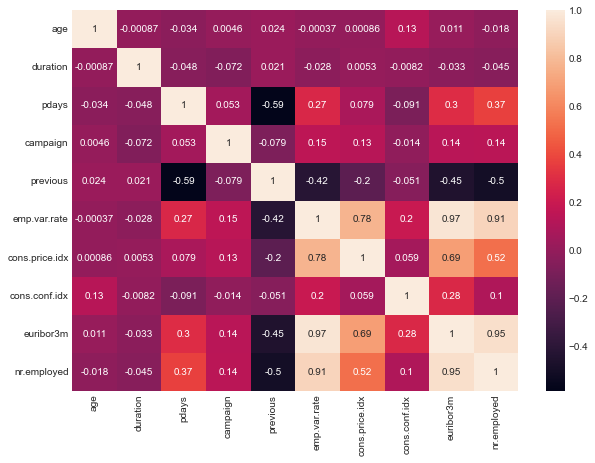

In [23]:
#Correlation Heatmap
bank_raw_df = bank_raw[['age', 'duration', 'pdays', 'campaign', 'previous','emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
plt.figure(figsize=(10,7))
sns.heatmap(data=bank_raw_df.corr(), annot=True)
plt.show()

the feature "previous" seems to have have high correlation with pdays and all the economic indicators have high correlation to each other and may lead to multicollinearity issue.

In [24]:
checkdf=bank_raw[['pdays','previous']]

In [25]:
checkdf.pivot_table(index='pdays', columns='previous', 
                        aggfunc=len, fill_value=0)

previous 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 
 
 pdays 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0 
 7 
 4 
 2 
 1 
 1 
 0 
 0 
 
 
 1 
 0 
 16 
 5 
 3 
 1 
 0 
 1 
 0 
 
 
 2 
 0 
 42 
 12 
 3 
 3 
 1 
 0 
 0 
 
 
 3 
 0 
 250 
 114 
 43 
 19 
 9 
 3 
 1 
 
 
 4 
 0 
 73 
 29 
 14 
 2 
 0 
 0 
 0 
 
 
 5 
 0 
 28 
 11 
 5 
 0 
 2 
 0 
 0 
 
 
 6 
 0 
 220 
 117 
 57 
 16 
 2 
 0 
 0 
 
 
 7 
 0 
 26 
 23 
 8 
 3 
 0 
 0 
 0 
 
 
 8 
 0 
 9 
 6 
 2 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 27 
 22 
 12 
 3 
 0 
 0 
 0 
 
 
 10 
 0 
 37 
 7 
 5 
 3 
 0 
 0 
 0 
 
 
 11 
 0 
 20 
 6 
 1 
 1 
 0 
 0 
 0 
 
 
 12 
 0 
 41 
 14 
 2 
 1 
 0 
 0 
 0 
 
 
 13 
 0 
 22 
 13 
 1 
 0 
 0 
 0 
 0 
 
 
 14 
 0 
 12 
 6 
 1 
 1 
 0 
 0 
 0 
 
 
 15 
 0 
 15 
 5 
 3 
 1 
 0 
 0 
 0 
 
 
 16 
 0 
 9 
 1 
 1 
 0 
 0 
 0 
 0 
 
 
 17 
 0 
 2 
 3 
 2 
 1 
 0 
 0 
 0 
 
 
 18 
 0 
 2 
 4 
 1 
 0 
 0 
 0 
 0 
 
 
 19 
 0 
 2 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 20 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 21 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 22 
 0 
 3 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 25 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 26 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 27 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 999 
 35563 
 3696 
 349 
 50 
 12 
 2 
 1 
 0

The correlation is due to 34521 customers not contacted so comes in pdays(999) and previous contact 0. So pdays can be removed as previous is a stronger feature.

# Preprocessing Data

In [26]:
#Duration and campaign has most outliers and needs to be treated

#Duration 1500 based on boxplot and campaign of 10

bank_int=bank_raw[~(bank_raw['campaign']>10)]
bank_int=bank_int[~(bank_int['duration']>1500)]



# cols = ['duration','campaign'] 

# # Calculate quantiles and IQR
# Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# # Return a boolean array of the rows with (any) non-outlier column values
# condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# # Filter our dataframe based on condition
# filtered_df = df[condition]

In [27]:
#Drop pdays and the encoded deposit
bank_int = bank_int.drop(columns=['pdays', 'deposit_encoded'])

In [28]:
bank_int.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [29]:
bank_int.head(10)

age 
 job 
 marital 
 education 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 duration 
 campaign 
 previous 
 poutcome 
 emp.var.rate 
 cons.price.idx 
 cons.conf.idx 
 euribor3m 
 nr.employed 
 deposit 
 
 
 
 
 0 
 56 
 housemaid 
 married 
 basic.4y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 261 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 1 
 57 
 services 
 married 
 high.school 
 unknown 
 no 
 no 
 telephone 
 may 
 mon 
 149 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 2 
 37 
 services 
 married 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 226 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 3 
 40 
 admin. 
 married 
 basic.6y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 151 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 4 
 56 
 services 
 married 
 high.school 
 no 
 no 
 yes 
 telephone 
 may 
 mon 
 307 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 5 
 45 
 services 
 married 
 basic.9y 
 unknown 
 no 
 no 
 telephone 
 may 
 mon 
 198 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 6 
 59 
 admin. 
 married 
 professional.course 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 139 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 7 
 41 
 blue-collar 
 married 
 unknown 
 unknown 
 no 
 no 
 telephone 
 may 
 mon 
 217 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 8 
 24 
 technician 
 single 
 professional.course 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 380 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 9 
 25 
 services 
 single 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 50 
 1 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no

Imputation of data

In [30]:
#Education, default, marital, housing and loan have unknown in them
#education, 4% unknown and no clear major value, so knn imputation
#default, also mode as predominantly (80%) is no
#marital represent 0.2% and can be replaced by mode (married)
#Housing,knn imputation
#Loan,mode (no)


bank_int[['education','default','marital','housing','loan']] = bank_int[['education','default','marital','housing','loan']].replace('unknown', np.nan)


In [31]:
#Check nan
bank_int['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [32]:
#Mode imputation
mode_col=['default','marital','loan','education','housing']
for col in mode_col:
    bank_int[col] = bank_int[col].fillna(bank_int[col].mode()[0])

In [33]:
bank_int['loan'].value_counts()

no     34036
yes     6080
Name: loan, dtype: int64

In [34]:
# # Knn imputation
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=15)

# imputed = imputer.fit_transform(bank_int_cp['education'])
# # df_imputed = pd.DataFrame(imputed, columns=df.columns)


Taking care of Collinear features (Economic Indicators)

In [35]:
bank_int["Economic_Indicators"]=FactorAnalysis(n_components=1).fit_transform(bank_int[['emp.var.rate',
                                                                                      'cons.price.idx',
                                                                                      'euribor3m','nr.employed']])

In [36]:
bank_int=bank_int.drop(['emp.var.rate','cons.price.idx','euribor3m','nr.employed'],axis=1)

In [37]:
bank_int.head(10)

age 
 job 
 marital 
 education 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 duration 
 campaign 
 previous 
 poutcome 
 cons.conf.idx 
 deposit 
 Economic_Indicators 
 
 
 
 
 0 
 56 
 housemaid 
 married 
 basic.4y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 261 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 1 
 57 
 services 
 married 
 high.school 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 149 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 2 
 37 
 services 
 married 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 226 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 3 
 40 
 admin. 
 married 
 basic.6y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 151 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 4 
 56 
 services 
 married 
 high.school 
 no 
 no 
 yes 
 telephone 
 may 
 mon 
 307 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 5 
 45 
 services 
 married 
 basic.9y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 198 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 6 
 59 
 admin. 
 married 
 professional.course 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 139 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 7 
 41 
 blue-collar 
 married 
 university.degree 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 217 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 8 
 24 
 technician 
 single 
 professional.course 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 380 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 9 
 25 
 services 
 single 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 50 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125

In [38]:
bank_int.shape

(40116, 17)

In [39]:
#Remove duplicates

bank_int=bank_int.drop_duplicates()
bank_int.shape

(40102, 17)

In [40]:
bank_int.head(10)

age 
 job 
 marital 
 education 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 duration 
 campaign 
 previous 
 poutcome 
 cons.conf.idx 
 deposit 
 Economic_Indicators 
 
 
 
 
 0 
 56 
 housemaid 
 married 
 basic.4y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 261 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 1 
 57 
 services 
 married 
 high.school 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 149 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 2 
 37 
 services 
 married 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 226 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 3 
 40 
 admin. 
 married 
 basic.6y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 151 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 4 
 56 
 services 
 married 
 high.school 
 no 
 no 
 yes 
 telephone 
 may 
 mon 
 307 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 5 
 45 
 services 
 married 
 basic.9y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 198 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 6 
 59 
 admin. 
 married 
 professional.course 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 139 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 7 
 41 
 blue-collar 
 married 
 university.degree 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 217 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 8 
 24 
 technician 
 single 
 professional.course 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 380 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125 
 
 
 9 
 25 
 services 
 single 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 50 
 1 
 0 
 nonexistent 
 -36.4 
 no 
 -0.72125

In [41]:
from sklearn.preprocessing import LabelEncoder
#create dict for binary encoding
dic = {"yes":1,"no":0}
lst = ["deposit","loan","default","housing"]
for i in lst:
    bank_int[i] = bank_int[i].map(dic)

In [42]:
# Ordinal Encoding
l=['month',"day_of_week","contact","poutcome"]
le=LabelEncoder()
for i in l:
    bank_int[i]=le.fit_transform(bank_int[i].values)

In [43]:
# OneHot Encoding 
bank_int = pd.get_dummies(bank_int, columns = ['job','marital','education'])

In [44]:
bank_int.head(10)

age 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 duration 
 campaign 
 previous 
 ... 
 marital_divorced 
 marital_married 
 marital_single 
 education_basic.4y 
 education_basic.6y 
 education_basic.9y 
 education_high.school 
 education_illiterate 
 education_professional.course 
 education_university.degree 
 
 
 
 
 0 
 56 
 0 
 0 
 0 
 1 
 6 
 1 
 261 
 1 
 0 
 ... 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 57 
 0 
 0 
 0 
 1 
 6 
 1 
 149 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 2 
 37 
 0 
 1 
 0 
 1 
 6 
 1 
 226 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 3 
 40 
 0 
 0 
 0 
 1 
 6 
 1 
 151 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 56 
 0 
 0 
 1 
 1 
 6 
 1 
 307 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 5 
 45 
 0 
 0 
 0 
 1 
 6 
 1 
 198 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 6 
 59 
 0 
 0 
 0 
 1 
 6 
 1 
 139 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 7 
 41 
 0 
 0 
 0 
 1 
 6 
 1 
 217 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 8 
 24 
 0 
 1 
 0 
 1 
 6 
 1 
 380 
 1 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 9 
 25 
 0 
 1 
 0 
 1 
 6 
 1 
 50 
 1 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 
 10 rows × 36 columns

In [45]:
bank_int=bank_int.reset_index()

In [46]:
bank_int.drop('index',axis=1,inplace=True)

In [47]:
bank_int

age 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 duration 
 campaign 
 previous 
 ... 
 marital_divorced 
 marital_married 
 marital_single 
 education_basic.4y 
 education_basic.6y 
 education_basic.9y 
 education_high.school 
 education_illiterate 
 education_professional.course 
 education_university.degree 
 
 
 
 
 0 
 56 
 0 
 0 
 0 
 1 
 6 
 1 
 261 
 1 
 0 
 ... 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 57 
 0 
 0 
 0 
 1 
 6 
 1 
 149 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 2 
 37 
 0 
 1 
 0 
 1 
 6 
 1 
 226 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 3 
 40 
 0 
 0 
 0 
 1 
 6 
 1 
 151 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 56 
 0 
 0 
 1 
 1 
 6 
 1 
 307 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 40097 
 73 
 0 
 1 
 0 
 0 
 7 
 0 
 334 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 40098 
 46 
 0 
 0 
 0 
 0 
 7 
 0 
 383 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 40099 
 56 
 0 
 1 
 0 
 0 
 7 
 0 
 189 
 2 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 40100 
 44 
 0 
 0 
 0 
 0 
 7 
 0 
 442 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 40101 
 74 
 0 
 1 
 0 
 0 
 7 
 0 
 239 
 3 
 1 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 
 40102 rows × 36 columns

In [48]:
bank_int['deposit'].value_counts()

0    35618
1     4484
Name: deposit, dtype: int64

In [49]:
X=bank_int.drop('deposit',axis=1)
Y=bank_int['deposit']

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [51]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for train_index,test_index in sss.split(X,Y):
    train_df = bank_int.loc[train_index]
    test_df = bank_int.loc[test_index]

In [52]:
print("Ratio for train dataset")
print(train_df['deposit'].value_counts()/train_df.shape[0])
print()
print("ratio for test dataset")
print(test_df['deposit'].value_counts()/test_df.shape[0])

Ratio for train dataset
0    0.888176
1    0.111824
Name: deposit, dtype: float64

ratio for test dataset
0    0.888205
1    0.111795
Name: deposit, dtype: float64


In [53]:
X_train = train_df.drop("deposit",axis=1)
Y_train = train_df['deposit']

X_test = test_df.drop("deposit",axis=1)
Y_test = test_df['deposit']

In [78]:
X_train.

age 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 duration 
 campaign 
 previous 
 ... 
 marital_divorced 
 marital_married 
 marital_single 
 education_basic.4y 
 education_basic.6y 
 education_basic.9y 
 education_high.school 
 education_illiterate 
 education_professional.course 
 education_university.degree 
 
 
 
 
 16128 
 24 
 0 
 0 
 0 
 0 
 3 
 4 
 74 
 5 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 17955 
 30 
 0 
 1 
 0 
 0 
 3 
 2 
 272 
 2 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 5400 
 48 
 0 
 1 
 0 
 1 
 6 
 1 
 136 
 2 
 0 
 ... 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 22518 
 56 
 0 
 0 
 0 
 0 
 1 
 4 
 168 
 2 
 0 
 ... 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 33910 
 25 
 0 
 0 
 0 
 0 
 6 
 0 
 72 
 2 
 1 
 ... 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 36948 
 35 
 0 
 0 
 0 
 0 
 9 
 3 
 421 
 2 
 1 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 22816 
 32 
 0 
 1 
 0 
 0 
 1 
 2 
 245 
 1 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 37819 
 63 
 0 
 1 
 0 
 0 
 7 
 3 
 408 
 3 
 0 
 ... 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4201 
 58 
 0 
 1 
 0 
 1 
 6 
 3 
 38 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 10504 
 50 
 0 
 1 
 1 
 1 
 4 
 4 
 64 
 6 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 
 28071 rows × 35 columns

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

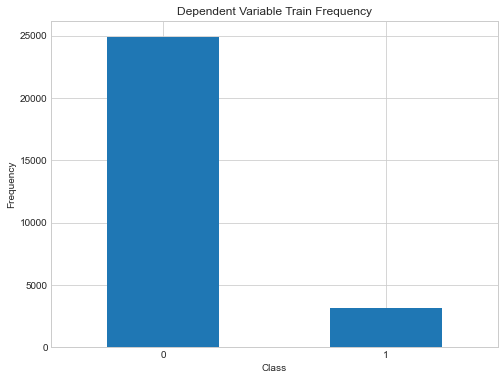

In [55]:
#Lets check the balance of the Target variable dataset (Whether the class have similar representation)
count_classes=pd.value_counts(Y_train,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Dependent Variable Train Frequency')
plt.xlabel("Class")
plt.ylabel("Frequency")

In [83]:
#Balance Train dataset
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train, Y_train)

In [18]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [87]:
#Logistic Regression
lr= LogisticRegression()

lr.fit(X_smote,Y_smote)
Y_pred_lr = lr.predict(X_test)

print("Testing Accuracy of LogisticRegression : ",metrics.accuracy_score(Y_test,Y_pred_lr))
#print("Accuracy of LogisticRegression",pipe_lr.score(X_test,Y_test))

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_s,Y_train))

Testing Accuracy of LogisticRegression :  0.8666777491480342
Training Accuracy of LogisticRegression :  0.5480032774037262


In [59]:
print(classification_report(Y_test,Y_pred_lr))
print(confusion_matrix(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10686
           1       0.42      0.87      0.57      1345

    accuracy                           0.85     12031
   macro avg       0.70      0.86      0.74     12031
weighted avg       0.92      0.85      0.87     12031

[[9093 1593]
 [ 172 1173]]


In [60]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=5)

gb.fit(X_smote,Y_smote)
y_train_preds = gb.predict(X_smote)
y_test_preds = gb.predict(X_test_s)

print('The accuracy of the GB is',metrics.accuracy_score(Y_test,y_test_preds))
print('The accuracy of the GB is',metrics.accuracy_score(y_train_preds,Y_smote))

The accuracy of the GB is 0.9000914304712825
The accuracy of the GB is 0.936427081662121


In [61]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     10686
           1       0.54      0.78      0.64      1345

    accuracy                           0.90     12031
   macro avg       0.75      0.85      0.79     12031
weighted avg       0.92      0.90      0.91     12031

[[9779  907]
 [ 295 1050]]


In [85]:
import xgboost 
xgb = xgboost.XGBClassifier(n_estimators=80, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)
xgb.fit(X_smote,Y_smote)

#calculate and print scores for the model
y_train_preds = xgb.predict(X_smote)
y_test_preds = xgb.predict(X_test)


print('The accuracy of the GB is',metrics.accuracy_score(Y_test,y_test_preds))
print('The accuracy of the GB is',metrics.accuracy_score(y_train_preds,Y_smote))

The accuracy of the GB is 0.9106474939739008
The accuracy of the GB is 0.9521699021338039


In [63]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     10686
           1       0.58      0.73      0.65      1345

    accuracy                           0.91     12031
   macro avg       0.77      0.83      0.80     12031
weighted avg       0.92      0.91      0.92     12031

[[9986  700]
 [ 362  983]]


In [64]:
y_test_proba = xgb.predict_proba(X_test_s)

In [77]:
len(X_test_s[0])

35

In [65]:
len(y_test_proba)

12031

In [66]:
Y_test.value_counts()

0    10686
1     1345
Name: deposit, dtype: int64

In [79]:
X_columns=list(X_train.columns)

In [81]:
X_header=pd.DataFrame(X_test_s,columns=X_columns)

In [1]:
#Benchmarking across multiple classifiers

In [3]:
X_smote=catalog.load("X_smote")
Y_smote=catalog.load("Y_smote")
Y_test=catalog.load("Y_test")
X_test_scaled=catalog.load("X_test_scaled")

[09/20/22 20:20:00] INFO     Loading data from 'X_smote' (PickleDataSet)...                     ]8;id=111863;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=662694;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'Y_smote' (PickleDataSet)...                     ]8;id=972082;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=829765;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'Y_test' (PickleDataSet)...                      ]8;id=149613;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=337839;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'X_test_scaled' (PickleDataSet)...               ]8;id=375820;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=110838;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

Scoring Parameter - accuracy
>lr 0.873 (0.006)
>knn 0.924 (0.006)
>svm 0.921 (0.006)
>bayes 0.779 (0.009)
>randomf 0.959 (0.005)
>xgb 0.953 (0.004)
>catb 0.955 (0.004)
>lgbm 0.955 (0.004)


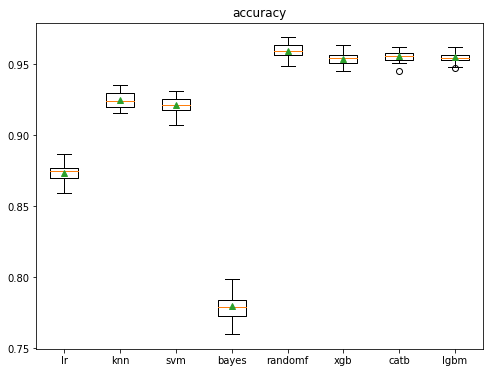

Scoring Parameter - precision
>lr 0.862 (0.008)
>knn 0.872 (0.009)
>svm 0.888 (0.008)
>bayes 0.795 (0.009)
>randomf 0.947 (0.007)
>xgb 0.955 (0.006)
>catb 0.955 (0.006)
>lgbm 0.951 (0.006)


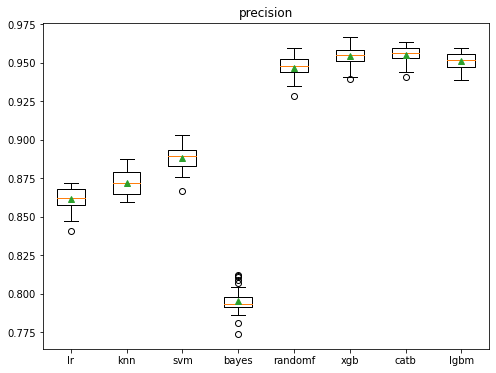

Scoring Parameter - recall
>lr 0.889 (0.009)
>knn 0.995 (0.002)
>svm 0.964 (0.005)
>bayes 0.752 (0.015)
>randomf 0.973 (0.005)
>xgb 0.952 (0.006)
>catb 0.956 (0.005)
>lgbm 0.958 (0.005)


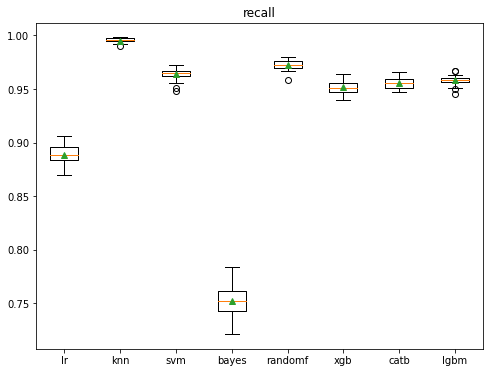

Scoring Parameter - f1
>lr 0.875 (0.006)
>knn 0.929 (0.005)
>svm 0.924 (0.005)
>bayes 0.773 (0.010)
>randomf 0.959 (0.005)
>xgb 0.953 (0.004)
>catb 0.956 (0.004)
>lgbm 0.955 (0.004)


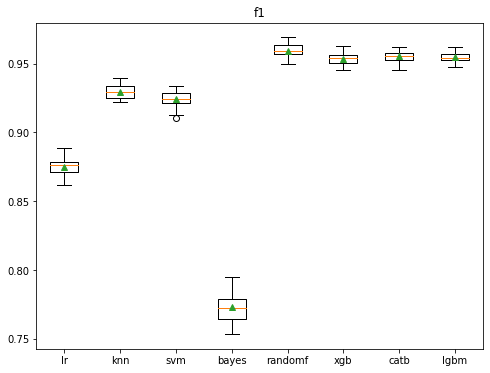

Scoring Parameter - roc_auc
>lr 0.935 (0.004)
>knn 0.970 (0.003)
>svm 0.966 (0.003)
>bayes 0.841 (0.008)
>randomf 0.995 (0.001)
>xgb 0.993 (0.001)
>catb 0.994 (0.001)
>lgbm 0.994 (0.001)


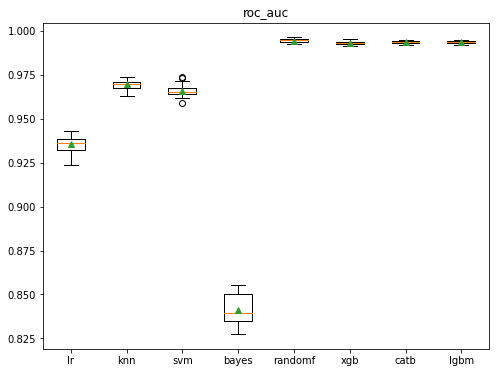

In [14]:
#Lets populate the accuracy of multiple models with a boxplot visualization to understand the spread and mean better
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#Boosting algorithms
import xgboost
import catboost as ctb
import lightgbm as lgb

from matplotlib import pyplot
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(multi_class='ovr',random_state=42)
    models['knn'] = KNeighborsClassifier()
    models['svm'] = SVC(random_state=42)
    models['bayes'] = GaussianNB()
    models['randomf'] = RandomForestClassifier(random_state=42)
    models['xgb'] = xgboost.XGBClassifier(random_state=42)
    models['catb']=ctb.CatBoostClassifier(random_state=42)
    models['lgbm']=lgb.LGBMClassifier(random_state=42)
    return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y,score):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring=score, cv=cv, n_jobs=-1, error_score=
    'raise')
    return scores
# get the models to evaluate
models = get_models()
scoring=['accuracy','precision','recall','f1','roc_auc']
# evaluate the models and store results
for scor in scoring:
    results, names = list(), list()
    print(f'Scoring Parameter - {scor}')
    for name, model in models.items():
        scores = evaluate_model(model, X_smote,Y_smote,scor)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.title(scor)
    pyplot.show()

In [16]:
#Random Forest - SearchGridCV to identify the best parameter for model

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


from sklearn.model_selection import GridSearchCV

RFModel = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
rfCV = GridSearchCV(RFModel, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)
best_rfCV = rfCV.fit(X_smote,Y_smote)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


In [19]:
print(best_rfCV.best_estimator_)
print (f'Accuracy - : {best_rfCV.score(X_smote,Y_smote):.3f}')

grid_predictionsrf = best_rfCV.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionsrf))
print(classification_report(Y_test, grid_predictionsrf))

RandomForestClassifier(max_depth=8, n_estimators=500)
Accuracy - : 0.940
[[9720  966]
 [ 179 1166]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     10686
           1       0.55      0.87      0.67      1345

    accuracy                           0.90     12031
   macro avg       0.76      0.89      0.81     12031
weighted avg       0.93      0.90      0.91     12031



In [20]:
#Cat Boost - SearchGridCV to identify the best parameter for model

param_gridcat = { 
    'depth': [4, 5, 6],
    'n_estimators': [100,200,300,400],
    'learning_rate' : [0.1,0.2,0.4,0.6]
}


from sklearn.model_selection import GridSearchCV

ctb = ctb.CatBoostClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
catCV = GridSearchCV(ctb, param_grid = param_gridcat, cv = cv, verbose=True, n_jobs=-1)
best_catCV = catCV.fit(X_smote,Y_smote)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
0:	learn: 0.5826801	total: 185ms	remaining: 36.8s
1:	learn: 0.5007218	total: 192ms	remaining: 19s
2:	learn: 0.4477877	total: 199ms	remaining: 13.1s
3:	learn: 0.4056756	total: 206ms	remaining: 10.1s
4:	learn: 0.3742252	total: 214ms	remaining: 8.35s
5:	learn: 0.3505227	total: 221ms	remaining: 7.14s
6:	learn: 0.3299465	total: 228ms	remaining: 6.28s
7:	learn: 0.3141069	total: 235ms	remaining: 5.63s
8:	learn: 0.3025488	total: 242ms	remaining: 5.13s
9:	learn: 0.2908754	total: 249ms	remaining: 4.72s
10:	learn: 0.2723360	total: 256ms	remaining: 4.39s
11:	learn: 0.2528707	total: 262ms	remaining: 4.11s
12:	learn: 0.2472985	total: 270ms	remaining: 3.88s
13:	learn: 0.2376466	total: 277ms	remaining: 3.67s
14:	learn: 0.2333414	total: 284ms	remaining: 3.5s
15:	learn: 0.2282145	total: 291ms	remaining: 3.34s
16:	learn: 0.2222085	total: 297ms	remaining: 3.2s
17:	learn: 0.2172802	total: 304ms	remaining: 3.07s
18:	learn: 0.2075944	total: 311ms	

167:	learn: 0.0914698	total: 1.3s	remaining: 248ms
168:	learn: 0.0911458	total: 1.31s	remaining: 240ms
169:	learn: 0.0909075	total: 1.31s	remaining: 232ms
170:	learn: 0.0908257	total: 1.32s	remaining: 224ms
171:	learn: 0.0902223	total: 1.33s	remaining: 216ms
172:	learn: 0.0901015	total: 1.33s	remaining: 208ms
173:	learn: 0.0900229	total: 1.34s	remaining: 200ms
174:	learn: 0.0897332	total: 1.34s	remaining: 192ms
175:	learn: 0.0894065	total: 1.35s	remaining: 184ms
176:	learn: 0.0892754	total: 1.36s	remaining: 176ms
177:	learn: 0.0890585	total: 1.36s	remaining: 168ms
178:	learn: 0.0888887	total: 1.37s	remaining: 161ms
179:	learn: 0.0887854	total: 1.37s	remaining: 153ms
180:	learn: 0.0886294	total: 1.38s	remaining: 145ms
181:	learn: 0.0884774	total: 1.39s	remaining: 137ms
182:	learn: 0.0881604	total: 1.39s	remaining: 129ms
183:	learn: 0.0879375	total: 1.4s	remaining: 122ms
184:	learn: 0.0877830	total: 1.4s	remaining: 114ms
185:	learn: 0.0876382	total: 1.41s	remaining: 106ms
186:	learn: 0.0

In [21]:
print(best_catCV.best_estimator_)
print (f'Accuracy - : {best_catCV.score(X_smote,Y_smote):.3f}')

grid_predictionscat = best_catCV.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscat))
print(classification_report(Y_test, grid_predictionscat))

Accuracy - : 0.972
[[10390   296]
 [  294  1051]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     10686
           1       0.78      0.78      0.78      1345

    accuracy                           0.95     12031
   macro avg       0.88      0.88      0.88     12031
weighted avg       0.95      0.95      0.95     12031



0:	learn: 0.5798244	total: 5.88ms	remaining: 1.17s
1:	learn: 0.5023233	total: 11.7ms	remaining: 1.16s
2:	learn: 0.4501612	total: 16.8ms	remaining: 1.11s
3:	learn: 0.4018599	total: 22.8ms	remaining: 1.12s
4:	learn: 0.3663770	total: 29.2ms	remaining: 1.14s
5:	learn: 0.3409364	total: 34.7ms	remaining: 1.12s
6:	learn: 0.3223389	total: 40.7ms	remaining: 1.12s
7:	learn: 0.3044869	total: 46.8ms	remaining: 1.12s
8:	learn: 0.2896339	total: 52.1ms	remaining: 1.11s
9:	learn: 0.2634519	total: 57.4ms	remaining: 1.09s
10:	learn: 0.2444133	total: 63.6ms	remaining: 1.09s
11:	learn: 0.2293577	total: 70.2ms	remaining: 1.1s
12:	learn: 0.2129174	total: 76.9ms	remaining: 1.11s
13:	learn: 0.2070963	total: 83.3ms	remaining: 1.11s
14:	learn: 0.1956291	total: 89.2ms	remaining: 1.1s
15:	learn: 0.1872230	total: 95.4ms	remaining: 1.1s
16:	learn: 0.1770923	total: 102ms	remaining: 1.09s
17:	learn: 0.1729414	total: 107ms	remaining: 1.08s
18:	learn: 0.1678314	total: 113ms	remaining: 1.08s
19:	learn: 0.1639820	total: 

187:	learn: 0.0230305	total: 1.1s	remaining: 70.2ms
188:	learn: 0.0228850	total: 1.1s	remaining: 64.4ms
189:	learn: 0.0227441	total: 1.11s	remaining: 58.5ms
190:	learn: 0.0226634	total: 1.13s	remaining: 53.1ms
191:	learn: 0.0225536	total: 1.13s	remaining: 47.2ms
192:	learn: 0.0224764	total: 1.14s	remaining: 41.3ms
193:	learn: 0.0223783	total: 1.14s	remaining: 35.4ms
194:	learn: 0.0222133	total: 1.15s	remaining: 29.5ms
195:	learn: 0.0221542	total: 1.17s	remaining: 23.9ms
196:	learn: 0.0220507	total: 1.18s	remaining: 17.9ms
197:	learn: 0.0218924	total: 1.18s	remaining: 11.9ms
198:	learn: 0.0217507	total: 1.19s	remaining: 5.96ms
199:	learn: 0.0215355	total: 1.19s	remaining: 0us
0:	learn: 0.5799544	total: 5.66ms	remaining: 1.13s
1:	learn: 0.4972260	total: 12ms	remaining: 1.19s
2:	learn: 0.4419323	total: 17.7ms	remaining: 1.16s
3:	learn: 0.4075781	total: 23.6ms	remaining: 1.16s
4:	learn: 0.3740025	total: 29ms	remaining: 1.13s
5:	learn: 0.3474984	total: 34.1ms	remaining: 1.1s
6:	learn: 0.326

173:	learn: 0.0957422	total: 948ms	remaining: 142ms
174:	learn: 0.0954474	total: 954ms	remaining: 136ms
175:	learn: 0.0953224	total: 960ms	remaining: 131ms
176:	learn: 0.0951486	total: 966ms	remaining: 126ms
177:	learn: 0.0949604	total: 972ms	remaining: 120ms
178:	learn: 0.0947522	total: 979ms	remaining: 115ms
179:	learn: 0.0946382	total: 985ms	remaining: 109ms
180:	learn: 0.0943863	total: 991ms	remaining: 104ms
181:	learn: 0.0941993	total: 996ms	remaining: 98.5ms
182:	learn: 0.0940280	total: 1s	remaining: 93ms
183:	learn: 0.0938774	total: 1.01s	remaining: 87.5ms
184:	learn: 0.0937005	total: 1.01s	remaining: 82ms
185:	learn: 0.0934034	total: 1.02s	remaining: 76.5ms
186:	learn: 0.0930219	total: 1.02s	remaining: 71.1ms
187:	learn: 0.0927650	total: 1.03s	remaining: 65.6ms
188:	learn: 0.0925081	total: 1.03s	remaining: 60.1ms
189:	learn: 0.0923512	total: 1.04s	remaining: 54.6ms
190:	learn: 0.0922160	total: 1.04s	remaining: 49.2ms
191:	learn: 0.0919684	total: 1.05s	remaining: 43.7ms
192:	lea

165:	learn: 0.0977771	total: 926ms	remaining: 190ms
166:	learn: 0.0976531	total: 932ms	remaining: 184ms
167:	learn: 0.0973431	total: 938ms	remaining: 179ms
168:	learn: 0.0971824	total: 943ms	remaining: 173ms
169:	learn: 0.0970488	total: 948ms	remaining: 167ms
170:	learn: 0.0968958	total: 954ms	remaining: 162ms
171:	learn: 0.0965833	total: 959ms	remaining: 156ms
172:	learn: 0.0963210	total: 964ms	remaining: 151ms
173:	learn: 0.0961593	total: 970ms	remaining: 145ms
174:	learn: 0.0959007	total: 975ms	remaining: 139ms
175:	learn: 0.0957775	total: 980ms	remaining: 134ms
176:	learn: 0.0955404	total: 985ms	remaining: 128ms
177:	learn: 0.0954170	total: 990ms	remaining: 122ms
178:	learn: 0.0952011	total: 996ms	remaining: 117ms
179:	learn: 0.0949666	total: 1s	remaining: 111ms
180:	learn: 0.0948936	total: 1.01s	remaining: 106ms
181:	learn: 0.0945358	total: 1.01s	remaining: 100ms
182:	learn: 0.0942687	total: 1.02s	remaining: 94.5ms
183:	learn: 0.0940527	total: 1.02s	remaining: 88.9ms
184:	learn: 0

152:	learn: 0.1012501	total: 903ms	remaining: 277ms
153:	learn: 0.1009336	total: 909ms	remaining: 272ms
154:	learn: 0.1005515	total: 916ms	remaining: 266ms
155:	learn: 0.1002580	total: 923ms	remaining: 260ms
156:	learn: 0.1000991	total: 929ms	remaining: 254ms
157:	learn: 0.0995793	total: 935ms	remaining: 249ms
158:	learn: 0.0993446	total: 941ms	remaining: 243ms
159:	learn: 0.0990835	total: 946ms	remaining: 237ms
160:	learn: 0.0988251	total: 952ms	remaining: 231ms
161:	learn: 0.0985739	total: 957ms	remaining: 225ms
162:	learn: 0.0984021	total: 963ms	remaining: 219ms
163:	learn: 0.0981836	total: 969ms	remaining: 213ms
164:	learn: 0.0980113	total: 975ms	remaining: 207ms
165:	learn: 0.0979134	total: 981ms	remaining: 201ms
166:	learn: 0.0977240	total: 987ms	remaining: 195ms
167:	learn: 0.0973830	total: 993ms	remaining: 189ms
168:	learn: 0.0969896	total: 999ms	remaining: 183ms
169:	learn: 0.0966752	total: 1s	remaining: 177ms
170:	learn: 0.0964086	total: 1.01s	remaining: 171ms
171:	learn: 0.0

136:	learn: 0.1063060	total: 764ms	remaining: 351ms
137:	learn: 0.1061994	total: 770ms	remaining: 346ms
138:	learn: 0.1059594	total: 776ms	remaining: 340ms
139:	learn: 0.1056726	total: 781ms	remaining: 335ms
140:	learn: 0.1052540	total: 786ms	remaining: 329ms
141:	learn: 0.1050354	total: 792ms	remaining: 323ms
142:	learn: 0.1046491	total: 797ms	remaining: 318ms
143:	learn: 0.1045473	total: 802ms	remaining: 312ms
144:	learn: 0.1042972	total: 807ms	remaining: 306ms
145:	learn: 0.1041178	total: 813ms	remaining: 301ms
146:	learn: 0.1038974	total: 818ms	remaining: 295ms
147:	learn: 0.1037116	total: 823ms	remaining: 289ms
148:	learn: 0.1034407	total: 829ms	remaining: 284ms
149:	learn: 0.1031420	total: 834ms	remaining: 278ms
150:	learn: 0.1029395	total: 840ms	remaining: 273ms
151:	learn: 0.1027180	total: 846ms	remaining: 267ms
152:	learn: 0.1024025	total: 851ms	remaining: 261ms
153:	learn: 0.1022445	total: 857ms	remaining: 256ms
154:	learn: 0.1020631	total: 863ms	remaining: 251ms
155:	learn: 

97:	learn: 0.0497439	total: 551ms	remaining: 573ms
98:	learn: 0.0490116	total: 557ms	remaining: 568ms
99:	learn: 0.0484967	total: 564ms	remaining: 564ms
100:	learn: 0.0477553	total: 570ms	remaining: 558ms
101:	learn: 0.0475628	total: 576ms	remaining: 553ms
102:	learn: 0.0472812	total: 581ms	remaining: 547ms
103:	learn: 0.0469624	total: 587ms	remaining: 541ms
104:	learn: 0.0461322	total: 593ms	remaining: 536ms
105:	learn: 0.0458694	total: 598ms	remaining: 531ms
106:	learn: 0.0450500	total: 604ms	remaining: 525ms
107:	learn: 0.0435239	total: 611ms	remaining: 520ms
108:	learn: 0.0428629	total: 617ms	remaining: 515ms
109:	learn: 0.0419992	total: 624ms	remaining: 511ms
110:	learn: 0.0418838	total: 630ms	remaining: 505ms
111:	learn: 0.0411582	total: 635ms	remaining: 499ms
112:	learn: 0.0409033	total: 641ms	remaining: 493ms
113:	learn: 0.0404948	total: 646ms	remaining: 487ms
114:	learn: 0.0403532	total: 651ms	remaining: 481ms
115:	learn: 0.0402258	total: 657ms	remaining: 476ms
116:	learn: 0.0

95:	learn: 0.0033186	total: 369ms	remaining: 400ms
96:	learn: 0.0033186	total: 372ms	remaining: 395ms
97:	learn: 0.0033186	total: 378ms	remaining: 393ms
98:	learn: 0.0033186	total: 382ms	remaining: 389ms
99:	learn: 0.0032844	total: 389ms	remaining: 389ms
100:	learn: 0.0032595	total: 394ms	remaining: 386ms
101:	learn: 0.0032595	total: 398ms	remaining: 382ms
102:	learn: 0.0032594	total: 402ms	remaining: 379ms
103:	learn: 0.0032594	total: 406ms	remaining: 374ms
104:	learn: 0.0032357	total: 410ms	remaining: 371ms
105:	learn: 0.0032357	total: 413ms	remaining: 366ms
106:	learn: 0.0032356	total: 417ms	remaining: 362ms
107:	learn: 0.0032356	total: 420ms	remaining: 358ms
108:	learn: 0.0032162	total: 424ms	remaining: 354ms
109:	learn: 0.0032162	total: 428ms	remaining: 350ms
110:	learn: 0.0032162	total: 431ms	remaining: 346ms
111:	learn: 0.0032162	total: 434ms	remaining: 341ms
112:	learn: 0.0032162	total: 438ms	remaining: 338ms
113:	learn: 0.0031921	total: 443ms	remaining: 334ms
114:	learn: 0.003

58:	learn: 0.1382434	total: 385ms	remaining: 920ms
59:	learn: 0.1377163	total: 391ms	remaining: 913ms
60:	learn: 0.1350098	total: 398ms	remaining: 906ms
61:	learn: 0.1345975	total: 403ms	remaining: 897ms
62:	learn: 0.1342109	total: 409ms	remaining: 890ms
63:	learn: 0.1336497	total: 415ms	remaining: 882ms
64:	learn: 0.1331844	total: 420ms	remaining: 873ms
65:	learn: 0.1328599	total: 426ms	remaining: 864ms
66:	learn: 0.1324779	total: 432ms	remaining: 857ms
67:	learn: 0.1321422	total: 438ms	remaining: 850ms
68:	learn: 0.1317883	total: 443ms	remaining: 841ms
69:	learn: 0.1311329	total: 449ms	remaining: 833ms
70:	learn: 0.1308773	total: 454ms	remaining: 826ms
71:	learn: 0.1302700	total: 460ms	remaining: 817ms
72:	learn: 0.1296649	total: 466ms	remaining: 810ms
73:	learn: 0.1292050	total: 471ms	remaining: 802ms
74:	learn: 0.1289575	total: 478ms	remaining: 797ms
75:	learn: 0.1287058	total: 484ms	remaining: 789ms
76:	learn: 0.1283159	total: 489ms	remaining: 782ms
77:	learn: 0.1279228	total: 495

43:	learn: 0.0724764	total: 189ms	remaining: 670ms
44:	learn: 0.0724178	total: 193ms	remaining: 666ms
45:	learn: 0.0723106	total: 197ms	remaining: 658ms
46:	learn: 0.0722461	total: 200ms	remaining: 652ms
47:	learn: 0.0721675	total: 203ms	remaining: 644ms
48:	learn: 0.0720037	total: 207ms	remaining: 638ms
49:	learn: 0.0719464	total: 211ms	remaining: 634ms
50:	learn: 0.0719003	total: 215ms	remaining: 629ms
51:	learn: 0.0718095	total: 219ms	remaining: 625ms
52:	learn: 0.0717619	total: 223ms	remaining: 619ms
53:	learn: 0.0716525	total: 227ms	remaining: 614ms
54:	learn: 0.0715580	total: 231ms	remaining: 609ms
55:	learn: 0.0715075	total: 235ms	remaining: 604ms
56:	learn: 0.0713838	total: 238ms	remaining: 598ms
57:	learn: 0.0713114	total: 242ms	remaining: 593ms
58:	learn: 0.0712971	total: 246ms	remaining: 587ms
59:	learn: 0.0711921	total: 249ms	remaining: 582ms
60:	learn: 0.0711589	total: 253ms	remaining: 576ms
61:	learn: 0.0710751	total: 257ms	remaining: 572ms
62:	learn: 0.0710439	total: 260

36:	learn: 0.1587410	total: 198ms	remaining: 871ms
37:	learn: 0.1578985	total: 203ms	remaining: 865ms
38:	learn: 0.1571814	total: 208ms	remaining: 860ms
39:	learn: 0.1565389	total: 214ms	remaining: 854ms
40:	learn: 0.1554682	total: 219ms	remaining: 849ms
41:	learn: 0.1544284	total: 225ms	remaining: 845ms
42:	learn: 0.1538761	total: 230ms	remaining: 839ms
43:	learn: 0.1532552	total: 235ms	remaining: 834ms
44:	learn: 0.1528015	total: 240ms	remaining: 828ms
45:	learn: 0.1523391	total: 245ms	remaining: 822ms
46:	learn: 0.1504400	total: 251ms	remaining: 818ms
47:	learn: 0.1493029	total: 257ms	remaining: 813ms
48:	learn: 0.1488519	total: 262ms	remaining: 807ms
49:	learn: 0.1475103	total: 267ms	remaining: 801ms
50:	learn: 0.1470940	total: 273ms	remaining: 798ms
51:	learn: 0.1454972	total: 280ms	remaining: 796ms
52:	learn: 0.1453441	total: 285ms	remaining: 791ms
53:	learn: 0.1450034	total: 291ms	remaining: 786ms
54:	learn: 0.1441247	total: 296ms	remaining: 781ms
55:	learn: 0.1431326	total: 302

0:	learn: 0.4982917	total: 4.01ms	remaining: 798ms
1:	learn: 0.3265913	total: 8.24ms	remaining: 816ms
2:	learn: 0.2284556	total: 12.4ms	remaining: 813ms
3:	learn: 0.1850745	total: 16.1ms	remaining: 787ms
4:	learn: 0.1502470	total: 19.6ms	remaining: 764ms
5:	learn: 0.1269001	total: 23.2ms	remaining: 751ms
6:	learn: 0.1136017	total: 26.8ms	remaining: 738ms
7:	learn: 0.1043855	total: 30.5ms	remaining: 733ms
8:	learn: 0.0989581	total: 34.2ms	remaining: 725ms
9:	learn: 0.0947040	total: 37.9ms	remaining: 719ms
10:	learn: 0.0908380	total: 41.6ms	remaining: 715ms
11:	learn: 0.0871943	total: 45ms	remaining: 705ms
12:	learn: 0.0850301	total: 48.7ms	remaining: 700ms
13:	learn: 0.0837714	total: 52.3ms	remaining: 695ms
14:	learn: 0.0825600	total: 56.1ms	remaining: 692ms
15:	learn: 0.0810453	total: 59.8ms	remaining: 687ms
16:	learn: 0.0797862	total: 63.4ms	remaining: 683ms
17:	learn: 0.0789226	total: 67.1ms	remaining: 679ms
18:	learn: 0.0785250	total: 71.1ms	remaining: 678ms
19:	learn: 0.0778914	tot

190:	learn: 0.0626394	total: 738ms	remaining: 34.8ms
191:	learn: 0.0625980	total: 743ms	remaining: 30.9ms
192:	learn: 0.0625533	total: 747ms	remaining: 27.1ms
193:	learn: 0.0625533	total: 750ms	remaining: 23.2ms
194:	learn: 0.0625533	total: 781ms	remaining: 20ms
195:	learn: 0.0625532	total: 784ms	remaining: 16ms
196:	learn: 0.0625532	total: 788ms	remaining: 12ms
197:	learn: 0.0625533	total: 792ms	remaining: 8ms
198:	learn: 0.0625532	total: 800ms	remaining: 4.02ms
199:	learn: 0.0625532	total: 803ms	remaining: 0us
0:	learn: 0.5896614	total: 6.52ms	remaining: 1.3s
1:	learn: 0.5086335	total: 14.5ms	remaining: 1.43s
2:	learn: 0.4570241	total: 20.9ms	remaining: 1.37s
3:	learn: 0.4182388	total: 28.2ms	remaining: 1.38s
4:	learn: 0.3821977	total: 35.6ms	remaining: 1.39s
5:	learn: 0.3497350	total: 43.1ms	remaining: 1.39s
6:	learn: 0.3349467	total: 51.4ms	remaining: 1.42s
7:	learn: 0.3174985	total: 58.6ms	remaining: 1.41s
8:	learn: 0.3043377	total: 66.6ms	remaining: 1.41s
9:	learn: 0.2940457	tota

170:	learn: 0.0964086	total: 1.33s	remaining: 225ms
171:	learn: 0.0961232	total: 1.34s	remaining: 218ms
172:	learn: 0.0960333	total: 1.35s	remaining: 210ms
173:	learn: 0.0959175	total: 1.36s	remaining: 203ms
174:	learn: 0.0958350	total: 1.37s	remaining: 195ms
175:	learn: 0.0955442	total: 1.38s	remaining: 188ms
176:	learn: 0.0953518	total: 1.38s	remaining: 180ms
177:	learn: 0.0951107	total: 1.39s	remaining: 172ms
178:	learn: 0.0950314	total: 1.4s	remaining: 164ms
179:	learn: 0.0948518	total: 1.41s	remaining: 156ms
180:	learn: 0.0944904	total: 1.41s	remaining: 148ms
181:	learn: 0.0943443	total: 1.42s	remaining: 141ms
182:	learn: 0.0940677	total: 1.43s	remaining: 133ms
183:	learn: 0.0939296	total: 1.44s	remaining: 125ms
184:	learn: 0.0937033	total: 1.44s	remaining: 117ms
185:	learn: 0.0934624	total: 1.45s	remaining: 109ms
186:	learn: 0.0931546	total: 1.46s	remaining: 101ms
187:	learn: 0.0928979	total: 1.46s	remaining: 93.4ms
188:	learn: 0.0926675	total: 1.47s	remaining: 85.6ms
189:	learn:

171:	learn: 0.0629901	total: 727ms	remaining: 118ms
172:	learn: 0.0629747	total: 732ms	remaining: 114ms
173:	learn: 0.0629004	total: 736ms	remaining: 110ms
174:	learn: 0.0628673	total: 741ms	remaining: 106ms
175:	learn: 0.0627997	total: 746ms	remaining: 102ms
176:	learn: 0.0627632	total: 750ms	remaining: 97.4ms
177:	learn: 0.0626950	total: 755ms	remaining: 93.3ms
178:	learn: 0.0626282	total: 759ms	remaining: 89ms
179:	learn: 0.0625888	total: 763ms	remaining: 84.8ms
180:	learn: 0.0625753	total: 768ms	remaining: 80.6ms
181:	learn: 0.0624818	total: 772ms	remaining: 76.4ms
182:	learn: 0.0624460	total: 777ms	remaining: 72.2ms
183:	learn: 0.0623768	total: 781ms	remaining: 68ms
184:	learn: 0.0623239	total: 786ms	remaining: 63.8ms
185:	learn: 0.0622607	total: 791ms	remaining: 59.5ms
186:	learn: 0.0621889	total: 795ms	remaining: 55.3ms
187:	learn: 0.0621262	total: 800ms	remaining: 51.1ms
188:	learn: 0.0620436	total: 804ms	remaining: 46.8ms
189:	learn: 0.0619994	total: 809ms	remaining: 42.6ms
19

133:	learn: 0.1070663	total: 750ms	remaining: 370ms
134:	learn: 0.1068700	total: 757ms	remaining: 364ms
135:	learn: 0.1064594	total: 762ms	remaining: 359ms
136:	learn: 0.1063060	total: 768ms	remaining: 353ms
137:	learn: 0.1061994	total: 774ms	remaining: 348ms
138:	learn: 0.1059594	total: 780ms	remaining: 342ms
139:	learn: 0.1056726	total: 786ms	remaining: 337ms
140:	learn: 0.1052540	total: 792ms	remaining: 331ms
141:	learn: 0.1050354	total: 798ms	remaining: 326ms
142:	learn: 0.1046491	total: 804ms	remaining: 320ms
143:	learn: 0.1045473	total: 809ms	remaining: 315ms
144:	learn: 0.1042972	total: 816ms	remaining: 309ms
145:	learn: 0.1041178	total: 822ms	remaining: 304ms
146:	learn: 0.1038974	total: 827ms	remaining: 298ms
147:	learn: 0.1037116	total: 835ms	remaining: 293ms
148:	learn: 0.1034407	total: 841ms	remaining: 288ms
149:	learn: 0.1031420	total: 847ms	remaining: 282ms
150:	learn: 0.1029395	total: 853ms	remaining: 277ms
151:	learn: 0.1027180	total: 858ms	remaining: 271ms
152:	learn: 

92:	learn: 0.0698523	total: 360ms	remaining: 415ms
93:	learn: 0.0697676	total: 365ms	remaining: 411ms
94:	learn: 0.0697091	total: 369ms	remaining: 408ms
95:	learn: 0.0696441	total: 373ms	remaining: 404ms
96:	learn: 0.0695745	total: 377ms	remaining: 401ms
97:	learn: 0.0694809	total: 382ms	remaining: 398ms
98:	learn: 0.0694478	total: 386ms	remaining: 394ms
99:	learn: 0.0693861	total: 391ms	remaining: 391ms
100:	learn: 0.0693018	total: 396ms	remaining: 388ms
101:	learn: 0.0692097	total: 400ms	remaining: 385ms
102:	learn: 0.0690918	total: 405ms	remaining: 381ms
103:	learn: 0.0689873	total: 408ms	remaining: 377ms
104:	learn: 0.0689491	total: 413ms	remaining: 373ms
105:	learn: 0.0688640	total: 417ms	remaining: 369ms
106:	learn: 0.0687023	total: 420ms	remaining: 365ms
107:	learn: 0.0686324	total: 424ms	remaining: 361ms
108:	learn: 0.0685341	total: 429ms	remaining: 358ms
109:	learn: 0.0684939	total: 433ms	remaining: 354ms
110:	learn: 0.0684111	total: 437ms	remaining: 350ms
111:	learn: 0.068340

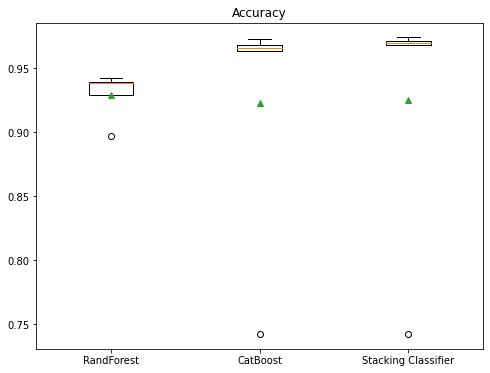

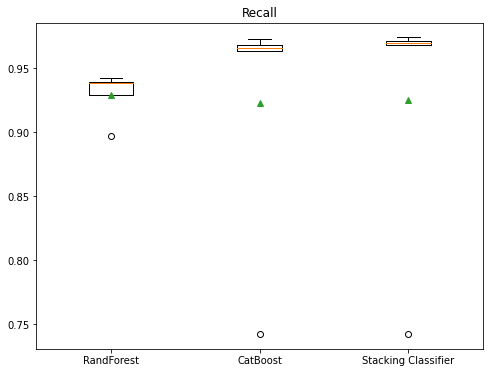

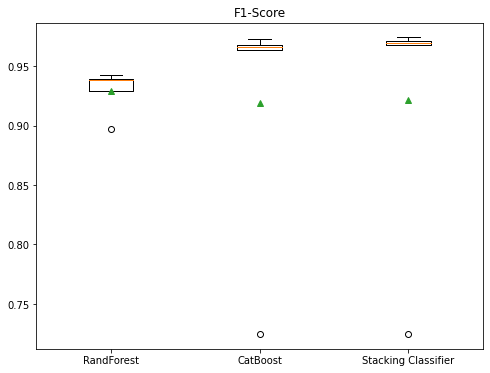

In [23]:
#Stack ensemble model with random forest as meta classifier, the learning classifiers are SVC and random forest.
# Lets check 3 scoring parameters to identify the performance better

import numpy as np
import warnings
from mlxtend.classifier import StackingClassifier
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


clf1 = best_rfCV.best_estimator_
clf2 = best_catCV.best_estimator_

sclf = StackingClassifier(classifiers=[clf1,clf2], 
                          use_probas=True,
                          meta_classifier=clf2)

scores=dict()  
for clf, label in zip([clf1, clf2, sclf], 
                      ['RandForest',
                       'CatBoost',
                      'Stacking Classifier']):
  scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1-score':'f1_macro'
           }
  
  scores[label] = model_selection.cross_validate(clf,  X_smote,Y_smote, 
                                              cv=5, scoring=scoring)
sorted(scores.keys())


modellabel=['RandForest','CatBoost','Stacking Classifier']
resultsacc, resultrecall,resultf1, names = list(), list(), list(), list()
for k in modellabel:
    
    resultsacc.append(scores[k]['test_accuracy'])
    resultrecall.append(scores[k]['test_recall'])
    resultf1.append(scores[k]['test_f1-score'])
    names.append(k)


from matplotlib import pyplot as plt
#fig, ax =plt.subplots(1,3)

plt.boxplot(resultsacc, labels=names, showmeans=True)
plt.title('Accuracy')
plt.show()


plt.boxplot(resultrecall, labels=names, showmeans=True)
plt.title('Recall')
plt.show()

plt.boxplot(resultf1, labels=names, showmeans=True)
plt.title('F1-Score')
plt.show()

In [26]:
sclf

StackingClassifier(classifiers=[RandomForestClassifier(max_depth=8,
                                                       n_estimators=500),
                                <catboost.core.CatBoostClassifier object at 0x0000024D7DCEAC50>],
                   meta_classifier=<catboost.core.CatBoostClassifier object at 0x0000024D7DCEAC50>,
                   use_probas=True)

In [27]:
#stacked Model
sclf.fit(X_smote,Y_smote)

grid_predictionsstacked = sclf.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionsstacked))
print(classification_report(Y_test, grid_predictionsstacked))

0:	learn: 0.5826801	total: 6.43ms	remaining: 1.28s
1:	learn: 0.5007218	total: 12.7ms	remaining: 1.26s
2:	learn: 0.4477877	total: 18.6ms	remaining: 1.22s
3:	learn: 0.4056756	total: 24.4ms	remaining: 1.2s
4:	learn: 0.3742252	total: 30.3ms	remaining: 1.18s
5:	learn: 0.3505227	total: 36ms	remaining: 1.17s
6:	learn: 0.3299465	total: 42.6ms	remaining: 1.18s
7:	learn: 0.3141069	total: 48.7ms	remaining: 1.17s
8:	learn: 0.3025488	total: 54.5ms	remaining: 1.16s
9:	learn: 0.2908754	total: 60.6ms	remaining: 1.15s
10:	learn: 0.2723360	total: 66.2ms	remaining: 1.14s
11:	learn: 0.2528707	total: 72.3ms	remaining: 1.13s
12:	learn: 0.2472985	total: 78.1ms	remaining: 1.12s
13:	learn: 0.2376466	total: 84ms	remaining: 1.11s
14:	learn: 0.2333414	total: 89.9ms	remaining: 1.11s
15:	learn: 0.2282145	total: 95.8ms	remaining: 1.1s
16:	learn: 0.2222085	total: 102ms	remaining: 1.09s
17:	learn: 0.2172802	total: 107ms	remaining: 1.08s
18:	learn: 0.2075944	total: 113ms	remaining: 1.08s
19:	learn: 0.2036931	total: 119

161:	learn: 0.0925351	total: 953ms	remaining: 223ms
162:	learn: 0.0923864	total: 959ms	remaining: 218ms
163:	learn: 0.0922799	total: 966ms	remaining: 212ms
164:	learn: 0.0920962	total: 972ms	remaining: 206ms
165:	learn: 0.0917959	total: 978ms	remaining: 200ms
166:	learn: 0.0917425	total: 983ms	remaining: 194ms
167:	learn: 0.0914698	total: 989ms	remaining: 188ms
168:	learn: 0.0911458	total: 994ms	remaining: 182ms
169:	learn: 0.0909075	total: 1s	remaining: 176ms
170:	learn: 0.0908257	total: 1s	remaining: 171ms
171:	learn: 0.0902223	total: 1.01s	remaining: 165ms
172:	learn: 0.0901015	total: 1.02s	remaining: 159ms
173:	learn: 0.0900229	total: 1.02s	remaining: 153ms
174:	learn: 0.0897332	total: 1.03s	remaining: 147ms
175:	learn: 0.0894065	total: 1.03s	remaining: 141ms
176:	learn: 0.0892754	total: 1.04s	remaining: 135ms
177:	learn: 0.0890585	total: 1.04s	remaining: 129ms
178:	learn: 0.0888887	total: 1.05s	remaining: 123ms
179:	learn: 0.0887854	total: 1.06s	remaining: 117ms
180:	learn: 0.0886

142:	learn: 0.0634052	total: 551ms	remaining: 220ms
143:	learn: 0.0633690	total: 556ms	remaining: 216ms
144:	learn: 0.0632942	total: 560ms	remaining: 213ms
145:	learn: 0.0632942	total: 564ms	remaining: 208ms
146:	learn: 0.0632942	total: 567ms	remaining: 204ms
147:	learn: 0.0632728	total: 570ms	remaining: 200ms
148:	learn: 0.0632208	total: 574ms	remaining: 197ms
149:	learn: 0.0632208	total: 577ms	remaining: 192ms
150:	learn: 0.0632207	total: 580ms	remaining: 188ms
151:	learn: 0.0632206	total: 583ms	remaining: 184ms
152:	learn: 0.0632206	total: 585ms	remaining: 180ms
153:	learn: 0.0632206	total: 588ms	remaining: 176ms
154:	learn: 0.0632206	total: 591ms	remaining: 172ms
155:	learn: 0.0632206	total: 594ms	remaining: 167ms
156:	learn: 0.0632205	total: 596ms	remaining: 163ms
157:	learn: 0.0632205	total: 599ms	remaining: 159ms
158:	learn: 0.0632204	total: 602ms	remaining: 155ms
159:	learn: 0.0632204	total: 605ms	remaining: 151ms
160:	learn: 0.0632204	total: 607ms	remaining: 147ms
161:	learn: 

In [29]:
sclf.best_scrore_

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\Nijel\AppData\Local\Temp\ipykernel_25132\1114471907.py:1 in <cell line: 1>              │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ 'C:\\Users\\Nijel\\AppData\\Local\\Temp\\ipykernel_25132\\1114471907.py'                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'StackingClassifier' object has no attribute 'best_scrore_'

In [67]:
#Explanation

In [68]:
import shap

In [86]:
# Fits the explainer
explainer = shap.Explainer(xgb.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 12032it [09:59, 19.61it/s]                                                                                                   


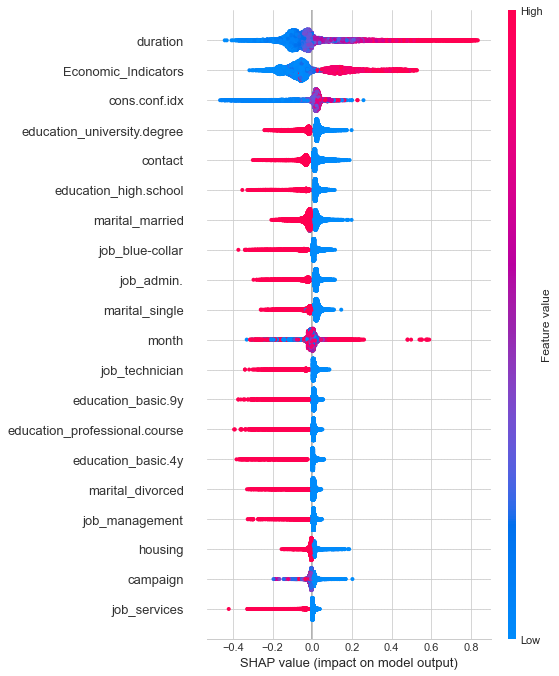

In [88]:
shap.summary_plot(shap_values)

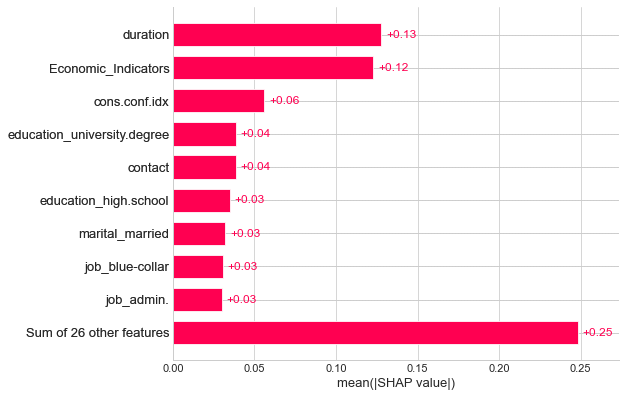

In [89]:
shap.plots.bar(shap_values)

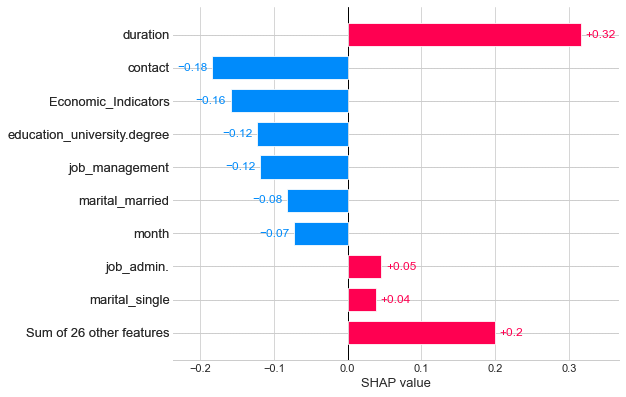

In [90]:
shap.plots.bar(shap_values[0])

In [91]:
shap_values[0]

.values =
array([ 0.00571429,  0.        ,  0.02357143, -0.015     , -0.18428571,
       -0.07214286, -0.015     ,  0.31571429, -0.02071429,  0.        ,
       -0.00071429,  0.03571429, -0.15857143,  0.04571429,  0.035     ,
        0.00571429,  0.00428571, -0.11857143,  0.00357143,  0.00642857,
        0.00142857,  0.00071429,  0.02785714,  0.00357143,  0.        ,
        0.01642857, -0.08214286,  0.03785714,  0.02571429,  0.00214286,
        0.02071429,  0.02571429,  0.        ,  0.00642857, -0.12285714])

.base_values =
0.14

.data =
array([ 35.        ,   0.        ,   0.        ,   1.        ,
         1.        ,   6.        ,   4.        , 717.        ,
         3.        ,   0.        ,   1.        , -36.4       ,
        -0.72181452,   0.        ,   0.        ,   0.        ,
         0.        ,   1.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ])

In [224]:
customer_final=catalog.load("customer_final")
inference_final=catalog.load("inference_final")

[09/01/22 18:27:08] INFO     Loading data from 'customer_final' (SQLTableDataSet)...            ]8;id=738847;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=417209;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'inference_final' (SQLTableDataSet)...           ]8;id=747198;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=973866;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [226]:
inference_final['Customer']=customer_final['Customer']

In [228]:
customer_final

Customer 
 
 
 
 
 0 
 110001003 
 
 
 1 
 110001013 
 
 
 2 
 110001014 
 
 
 3 
 110001017 
 
 
 4 
 110001018 
 
 
 ... 
 ... 
 
 
 4934 
 310009993 
 
 
 4935 
 110009995 
 
 
 4936 
 110009996 
 
 
 4937 
 210009996 
 
 
 4938 
 110009998 
 
 
 
 4939 rows × 1 columns

In [36]:
fit_model=catalog.load("fit_model")
fit_model1=catalog.load("fit_model1")
final_model=catalog.load("final_model")

[09/20/22 23:35:26] INFO     Loading data from 'fit_model' (PickleDataSet)...                   ]8;id=17966;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=451324;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'fit_model1' (PickleDataSet)...                  ]8;id=428844;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=896972;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'final_model' (PickleDataSet)...                 ]8;id=226007;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=2246;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [35]:
final_model

<function final_model at 0x0000024D7B1452D0>

In [32]:
grid_predictionscheck = fit_model.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscheck))
print(classification_report(Y_test, grid_predictionscheck))

[[10470   216]
 [  267  1078]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10686
           1       0.83      0.80      0.82      1345

    accuracy                           0.96     12031
   macro avg       0.90      0.89      0.90     12031
weighted avg       0.96      0.96      0.96     12031



In [33]:
grid_predictionscheck = fit_model1.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscheck))
print(classification_report(Y_test, grid_predictionscheck))

[[9715  971]
 [ 188 1157]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     10686
           1       0.54      0.86      0.67      1345

    accuracy                           0.90     12031
   macro avg       0.76      0.88      0.80     12031
weighted avg       0.93      0.90      0.91     12031



In [37]:
grid_predictionscheck = final_model.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscheck))
print(classification_report(Y_test, grid_predictionscheck))

[[10532   154]
 [  207  1138]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10686
           1       0.88      0.85      0.86      1345

    accuracy                           0.97     12031
   macro avg       0.93      0.92      0.92     12031
weighted avg       0.97      0.97      0.97     12031



In [38]:
classification_report=catalog.load("classification_report")

[09/21/22 21:49:22] INFO     Loading data from 'classification_report' (PickleDataSet)...       ]8;id=943318;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=8210;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [39]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99     10771\n           1       0.85      0.91      0.88      1260\n\n    accuracy                           0.97     12031\n   macro avg       0.92      0.95      0.93     12031\nweighted avg       0.97      0.97      0.97     12031\n'